In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import scipy.stats as stats
from scipy.signal import find_peaks
from scipy.interpolate import interp1d
from scipy.interpolate import splev, splrep, splprep, UnivariateSpline, LSQUnivariateSpline

from astropy.io import fits


In [2]:
%matplotlib inline

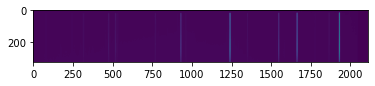

In [3]:
## Import test spectrum

path = '/Users/isabelkain/Desktop/ASTR257_2021/Project 4--Galaxy Rotation Curve'

arcs = fits.open(f'{path}/arcs.fits')[0]

plt.imshow(arcs.data)

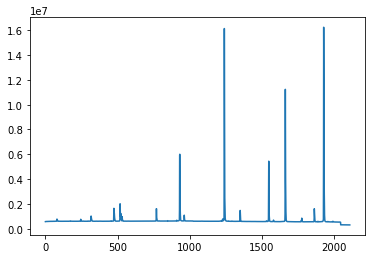

In [4]:
spectrum = np.sum(arcs.data, axis=0)
plt.plot(range(len(spectrum)), spectrum)

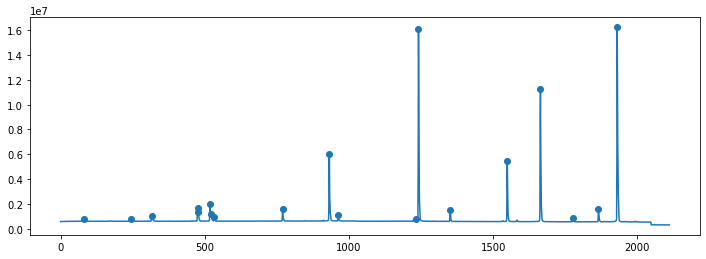

In [6]:
peaks_indx, __ = find_peaks(spectrum, height=0.07*10**7) # manually tune height req

plt.figure(figsize=(12,4))
plt.plot(range(len(spectrum)), spectrum)
plt.scatter(peaks_indx, spectrum[peaks_indx])

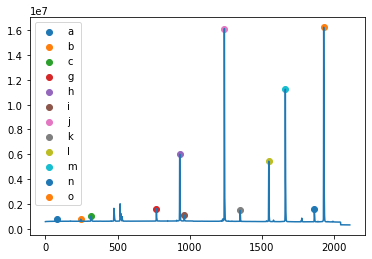

In [7]:
## Five tallest lines to the right:

wvl = {'a':326.105,
       'b':340.365,
       'c':346.655,
#        'd':361.051,
#        'e':365.015,
#        'f':366.288,
       'g':388.865, 
       'h':404.656,
       'i':407.783,
       'j':435.833,
       'k':447.150,
       'l':467.816,
       'm':479.992,
       'n':501.568,
       'o':508.582,
      }

## Visually match tallest lines to peak index

a = peaks_indx[0]
b = peaks_indx[1]
c = peaks_indx[2]
# d = peaks_indx[3]
# e = peaks_indx[5]
# f = peaks_indx[6]
g = peaks_indx[8]
h = peaks_indx[9]
i = peaks_indx[10]
j = peaks_indx[12]
k = peaks_indx[13]
l = peaks_indx[14]
m = peaks_indx[15]
n = peaks_indx[17]
o = peaks_indx[18]

indices = np.array([a,b,c,g,h,i,j,k,l,m,n,o]) #d,e,f,


## Check ID of peaks

plt.plot(range(len(spectrum)), spectrum)

plt.scatter(a, spectrum[a], label='a')
plt.scatter(b, spectrum[b], label='b')
plt.scatter(c, spectrum[c], label='c')
# plt.scatter(d, spectrum[d], label='d')
# plt.scatter(e, spectrum[e], label='e')
# plt.scatter(f, spectrum[f], label='f')
plt.scatter(g, spectrum[g], label='g')
plt.scatter(h, spectrum[h], label='h')
plt.scatter(i, spectrum[i], label='i')
plt.scatter(j, spectrum[j], label='j')
plt.scatter(k, spectrum[k], label='k')
plt.scatter(l, spectrum[l], label='l')
plt.scatter(m, spectrum[m], label='m')
plt.scatter(n, spectrum[n], label='n')
plt.scatter(o, spectrum[o], label='o')

plt.legend()

Text(0, 0.5, 'Lamp line wavelength')

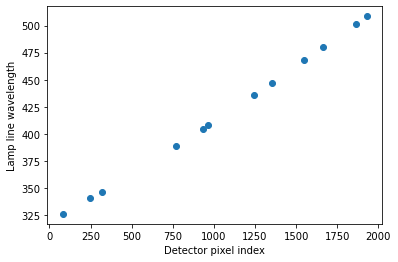

In [8]:
plt.scatter(indices, wvl.values())
plt.xlabel('Detector pixel index')
plt.ylabel('Lamp line wavelength')


[6.22983387e-06 8.63883631e-02 3.18866341e+02]


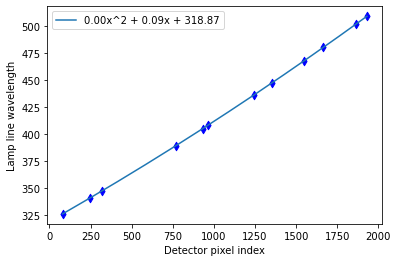

In [30]:
## Curve fit: quadratic

wvl_vals = np.array(list(wvl.values()))

p = np.polyfit(indices, wvl_vals, 2)
x = np.linspace(np.min(indices), np.max(indices), len(indices))

print(p)

plt.plot(x, p[0]*x**2 + p[1]*x + p[2], label=f'{p[0]:0.2f}x^2 + {p[1]:0.2f}x + {p[2]:0.2f}')
plt.scatter(indices, wvl.values(), marker='d', color='b')
plt.xlabel('Detector pixel index')
plt.ylabel('Lamp line wavelength')

plt.legend()

In [44]:
## Apply pixel solution, create wavelength axis

pxl_axis = np.arange(0,len(spectrum))
wavelengths = p[0]*pxl_axis**2 + p[1]*pxl_axis + p[2]

print(wavelengths[0], wavelengths[-1])
wavelengths

318.86634103265567 528.994315113472


array([318.86634103, 318.95273563, 319.03914268, ..., 528.76895859,
       528.88163062, 528.99431511])

Text(0, 0.5, 'Intensity')

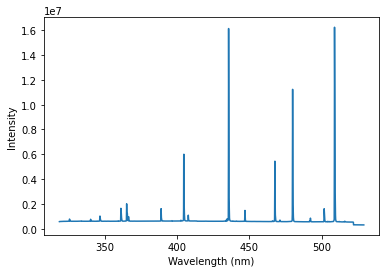

In [40]:
plt.plot(wavelengths, spectrum)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')

Text(0, 0.5, 'Intensity (counts)')

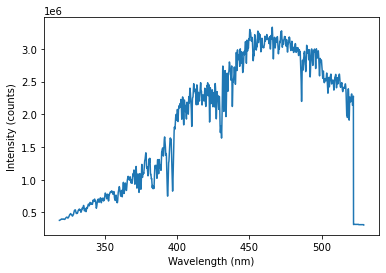

In [41]:
## Solar spectrum

s = fits.open(f'{path}/solar_spectrum.fits')[0]
solar = np.sum(s.data, axis=0)

plt.plot(wavelengths, solar) #  cmap='nipy_spectral'
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (counts)')

In [50]:
fraunhofer = {'P':336.112,
              'N':358.121,
              'L':382.044,
              'K':393.366,
              'H':396.847,
              'h':410.175,
              'G':430.774,
              'G\'':434.047,
              'e':438.355,
              'd':466.814,
              'F':486.134,
              'c':495.761,
              'b4':516.733,
              'b3':516.891,
              'b2':517.270,
              'b1':518.362,
             }

fraunhofer.values()

dict_values([336.112, 358.121, 382.044, 393.366, 396.847, 410.175, 430.774, 434.047, 438.355, 466.814, 486.134, 495.761, 516.733, 516.891, 517.27, 518.362])

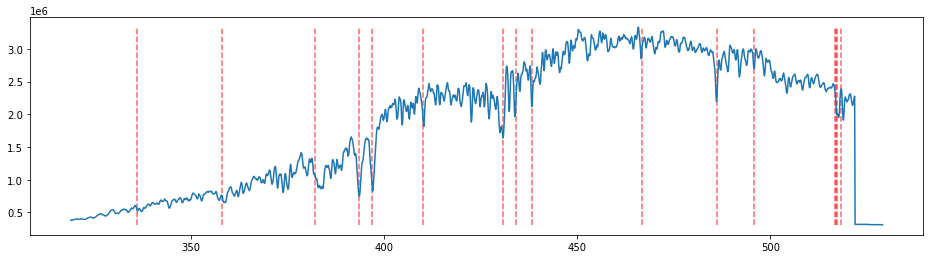

In [51]:
plt.figure(figsize=(16,4))
plt.plot(wavelengths, solar)
plt.vlines(fraunhofer.values(), solar.min(), solar.max(), ls='--', color='r', alpha=0.6)

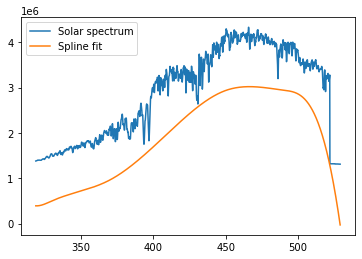

In [52]:
## Fit curve

# spl = UnivariateSpline(wavelengths, solar, s=0.9) # setting s doesn't seem to change anything…?
spl = LSQUnivariateSpline(wavelengths, solar, t=[330, 370, 410, 450, 490])

plt.plot(wavelengths, solar+10**6, label='Solar spectrum')
plt.plot(wavelengths, spl(wavelengths), label='Spline fit')

plt.legend()

(320.0, 525.0)

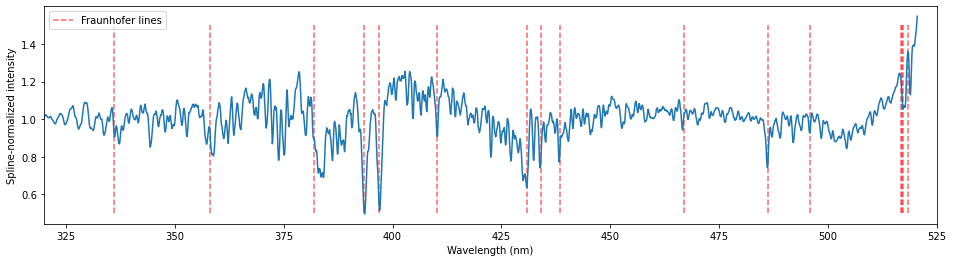

In [55]:
## Save spline-normalized data

solar_norm = solar[:2036]/spl(wavelengths[:2036])
wavelength_norm = wavelengths[:2036]

## Plot

plt.figure(figsize=(16,4))

plt.plot(wavelength_norm, solar_norm)
plt.vlines(fraunhofer.values(), 0.5, 1.5, ls='--', color='r', alpha=0.6, label='Fraunhofer lines')

plt.legend()
plt.xlabel('Wavelength (nm)')
plt.ylabel('Spline-normalized intensity')

plt.xlim(320, 525)